Name: Randi Prince, UID: u1431008, Date: 7/11/23, Assignment #: HW #5

In [164]:
# Imports and setup. 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

# Part 1: MNIST Handwritten Digits

In [165]:
# Code to scale images...

digits = load_digits()
X = scale( digits.data )
y = digits.target

n_samples, n_features = X.shape
n_digits = len( np.unique(digits.target) )

print( "n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features) )

n_digits: 10, n_samples 1797, n_features 64


In [166]:
# This is what one digit (the "zero") looks like:

print( "===\nThe raw data" )
print( digits.images[0] )

print( "===\nThe scaled data" )
print( X[0] )

print( "===\nThe digit" )
print( digits.target[0] )

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

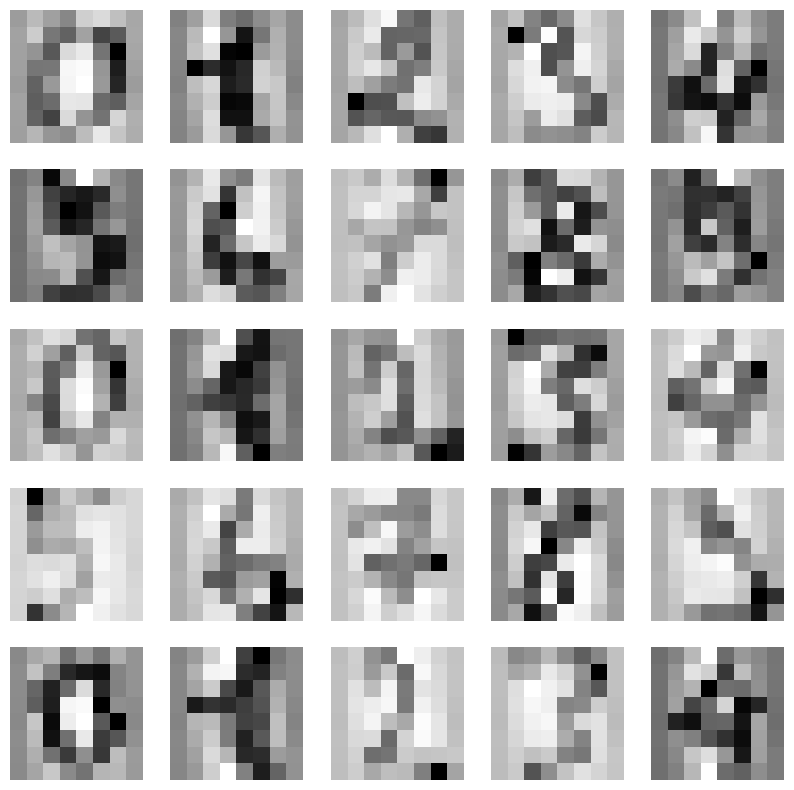

In [167]:
# Display the first 25 images...

plt.figure( figsize=(10, 10) )
 
for ii in np.arange( 25 ):
    plt.subplot( 5, 5, ii+1 )
    plt.imshow( np.reshape( X[ii,:], (8,8) ), cmap='Greys', interpolation='nearest' )
    plt.axis( 'off' )

plt.show()

## Task 1.1: Classification with Support Vector Machines (SVM)

In [168]:
# 1. Split the data into a training and test set using the command:

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=1, test_size=0.8 )

In [169]:
# 2. Use SVM with an rbf kernel and the cost parameter C=5 to build a classifier using the training dataset
clf = svm.SVC(kernel='rbf', C=5)
clf.fit(X_train, y_train)

SVC(C=5)

In [170]:
# 3.Using the test dataset, evaluate the accuracy of the model.
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9534075104311543


In [171]:
from sklearn.metrics import confusion_matrix

# 3. (cont)  Again using the test dataset, compute the confusion matrix.
#What is the most common mistake that the classifier makes?
predicted = clf.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(" from the confusion matrix, the highest non diagnol number is 13. this tells us that the most common mistake is that 7 is predicted but the actual value is 4")

[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]
 from the confusion matrix, the highest non diagnol number is 13. this tells us that the most common mistake is that 7 is predicted but the actual value is 4


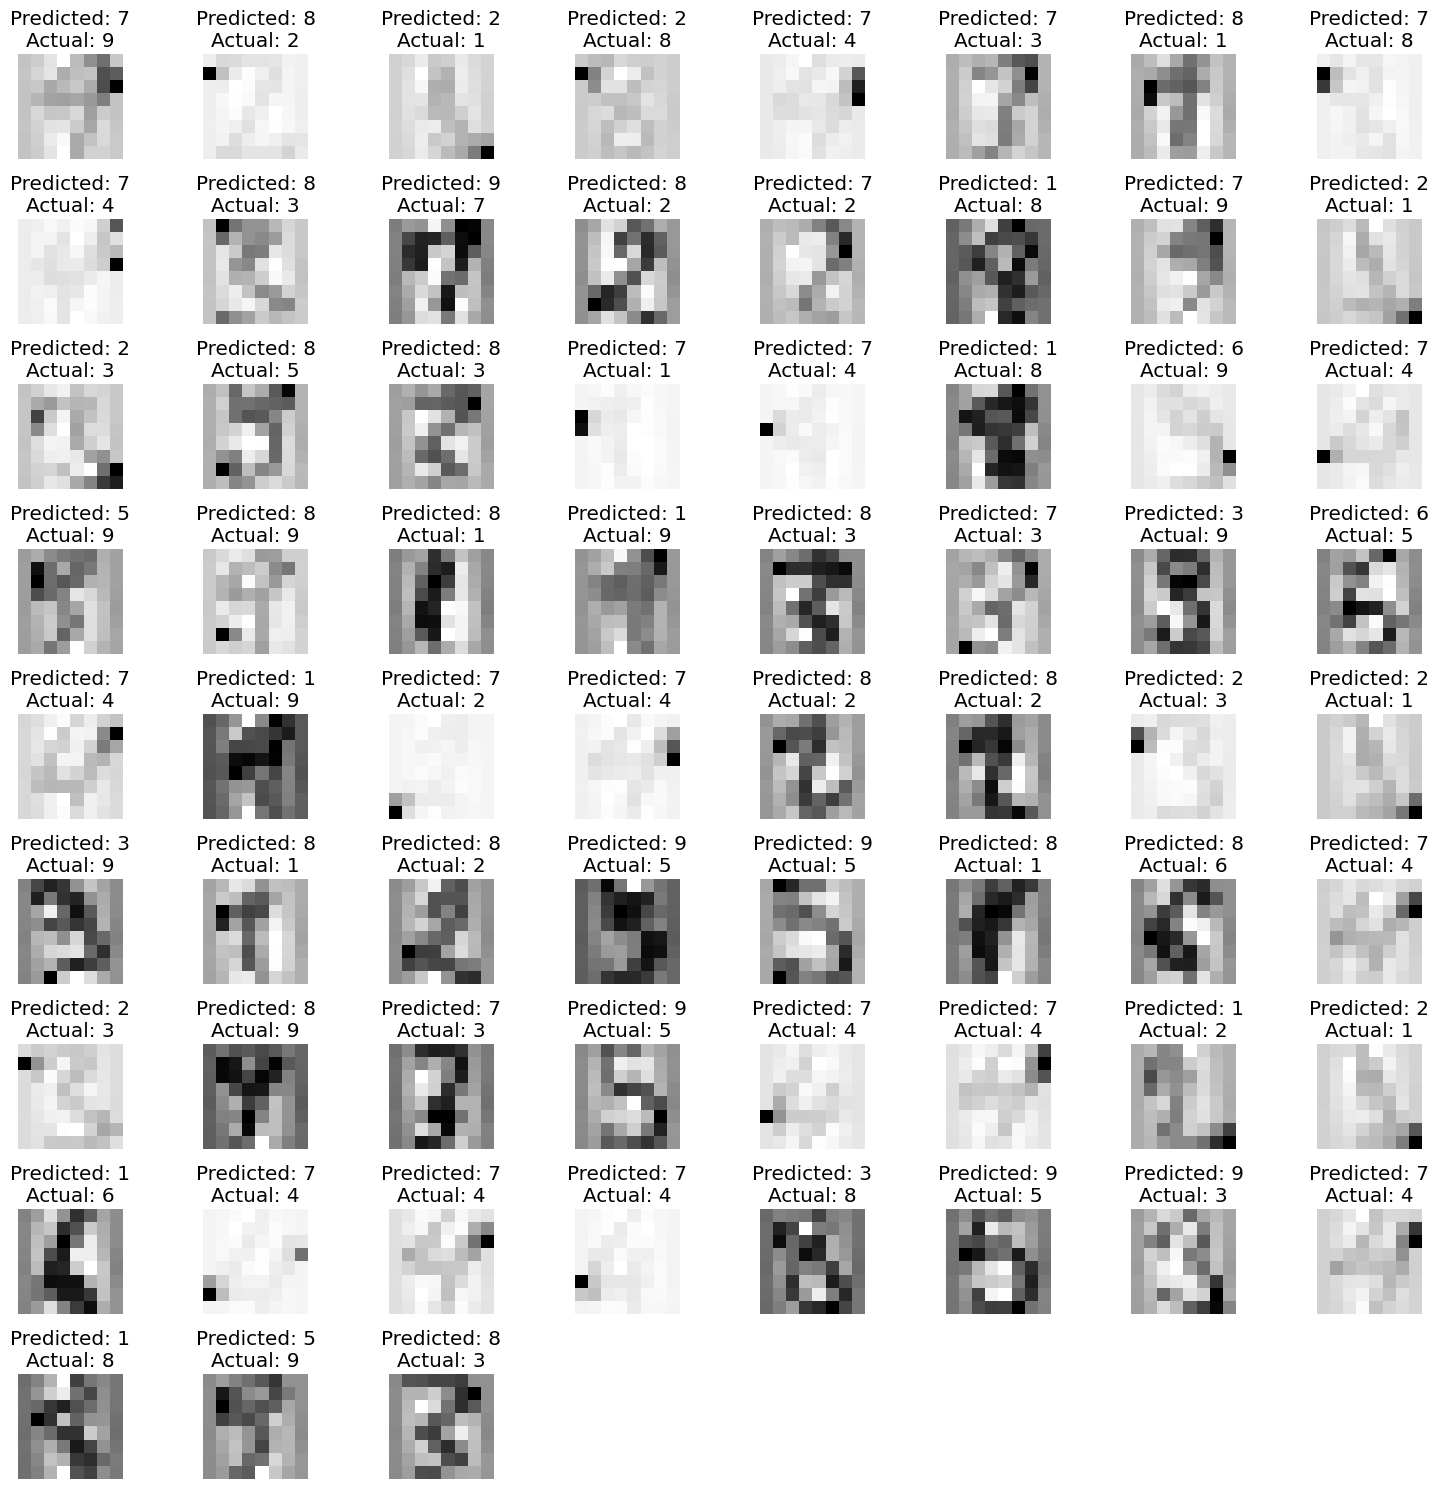

In [172]:
# 4. Display all of the misclassified digits as images (title with: Predicted #, Actual #).
misclassifiedIndices = np.where(y_test != predicted)[0]

plt.figure(figsize=(15, 15))
for i, index in enumerate(misclassifiedIndices):
    plt.subplot(9, 8, i+1)
    plt.axis("off")
    plt.imshow(np.reshape(X_test[index], (8,8)), cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {predicted[index]}\nActual: {y_test[index]}")
    
plt.tight_layout()  
plt.show()

Best value of c: 2.7999999999999994


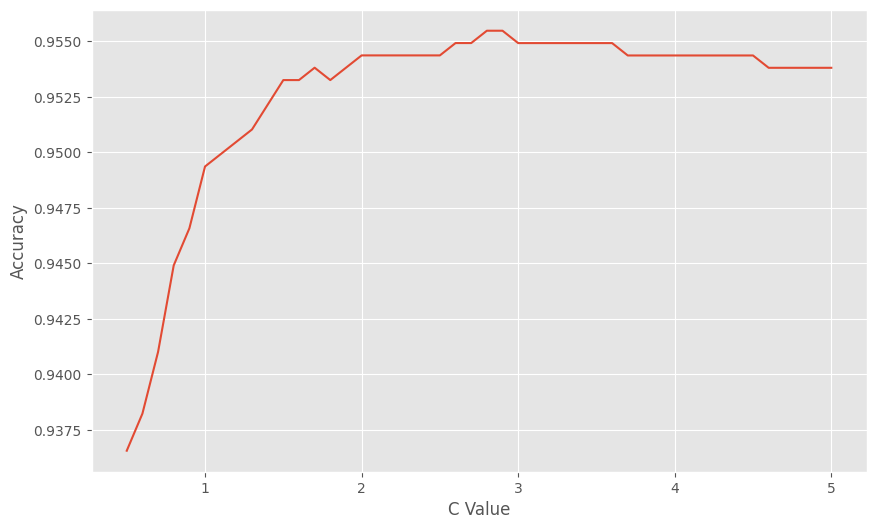

In [173]:
#5. Using the 'cross_val_score' function, evaluate the accuracy of the SVM for different values of the
#parameter C: .5 to 5 (by .1) and then 10-50 (by 20). What is the best value? (Graph results)
cValues = np.arange(0.5, 5.1, 0.1)
accuracyValues = []
for c in cValues:
    clf = svm.SVC(kernel='rbf', C = c)
    scores = cross_val_score( clf, X, y, cv=5 )
    accuracyValues.append(np.mean(scores))
#     print("C Value: ", c, "accuracy: ", np.mean(scores))


print("Best value of c:", cValues[np.argmax(accuracyValues)])
plt.plot(cValues, accuracyValues)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.show()

C Value:  10 accuracy:  0.9538053234292789
C Value:  30 accuracy:  0.9538053234292789
C Value:  50 accuracy:  0.9538053234292789
Best value of c: 10


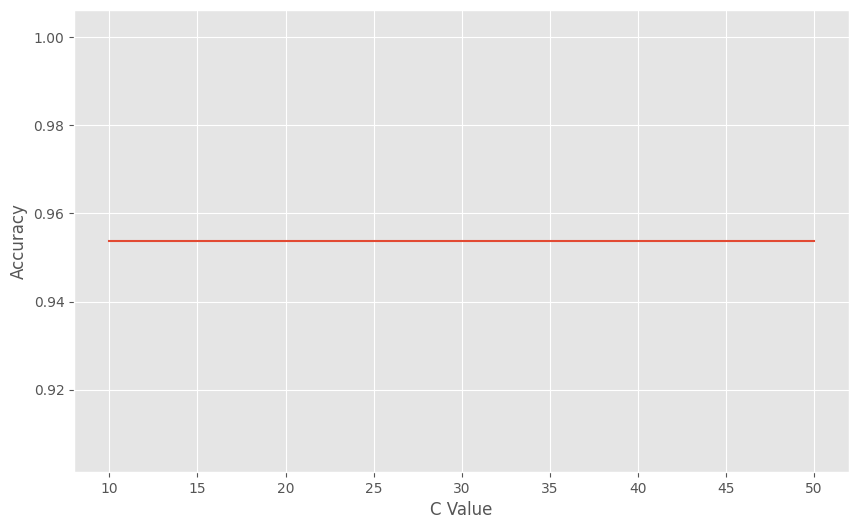

In [174]:
#5. Using the 'cross_val_score' function, evaluate the accuracy of the SVM for different values of the
#parameter C: 10-50 (by 20). What is the best value? (Graph results)
cValues = np.arange(10, 51, 20)
accuracyValues = []
for c in cValues:
    clf = svm.SVC(kernel='rbf', C = c)
    scores = cross_val_score( clf, X, y, cv=5 )
    accuracyValues.append(np.mean(scores))
    print("C Value: ", c, "accuracy: ", np.mean(scores))

print("Best value of c:", cValues[np.argmax(accuracyValues)])
plt.plot(cValues, accuracyValues)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.show()

In [175]:
# 6. Train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=1, test_size=0.8 )
clf = svm.SVC(kernel='rbf', C=5)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9756606397774688


## Task 1.2: Prediction with K-nearest Neighbors

In [176]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=1, test_size=0.8 )


In [177]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [178]:
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9123783031988874


In [179]:
from sklearn.metrics import confusion_matrix

predicted = clf.predict(X_test)
print(confusion_matrix(y_test, predicted))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]


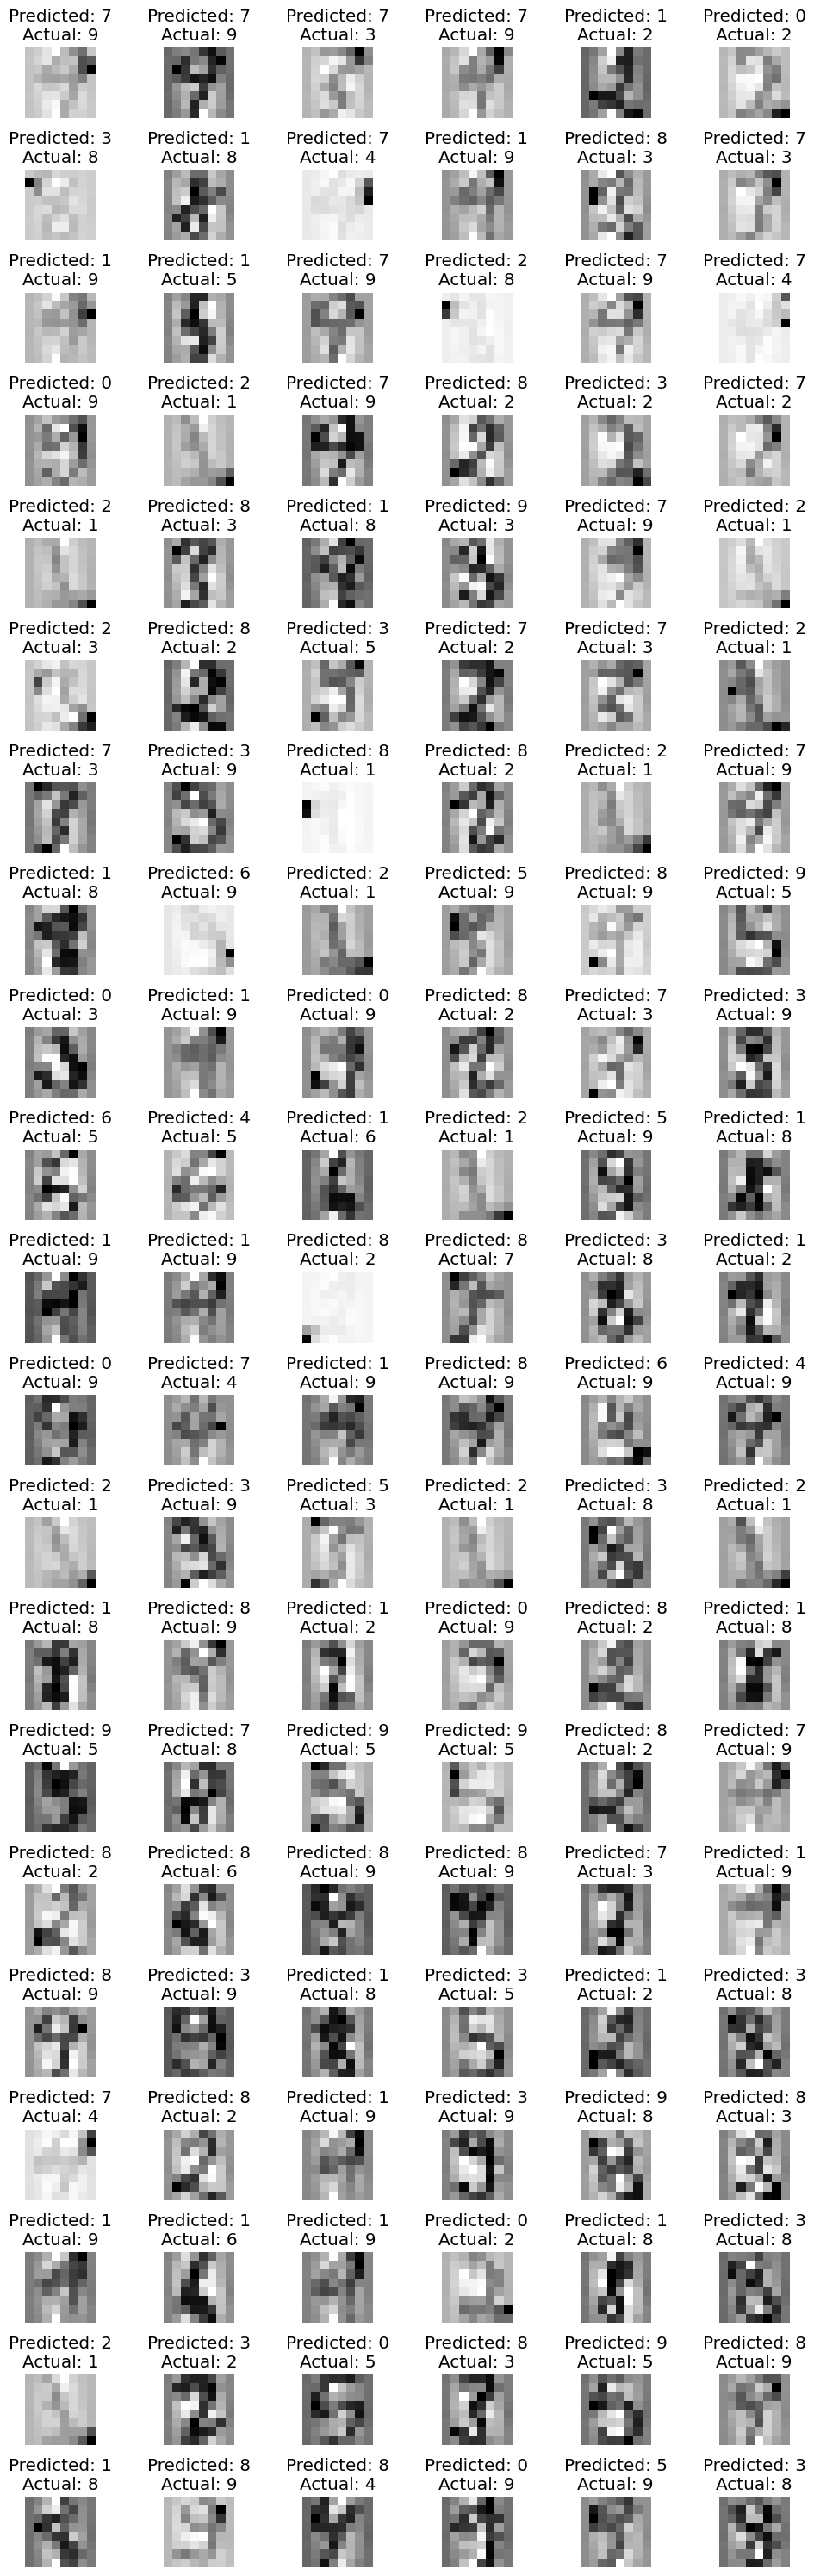

In [180]:
misclassifiedIndices = np.where(y_test != predicted)[0]

plt.figure(figsize=(10, 30))
for i, index in enumerate(misclassifiedIndices):
    plt.subplot(21, 6, i+1)
    plt.axis("off")
    plt.imshow(np.reshape(X_test[index], (8,8)), cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {predicted[index]}\nActual: {y_test[index]}")
    
plt.tight_layout()  
plt.show()

K Value:  1 accuracy:  0.9432544103992573
K Value:  2 accuracy:  0.9371231816774992
K Value:  3 accuracy:  0.9449257195914577
K Value:  4 accuracy:  0.9449210770659239
K Value:  5 accuracy:  0.9438099659548127
K Value:  6 accuracy:  0.9449226245744352
K Value:  7 accuracy:  0.9443670690188796
K Value:  8 accuracy:  0.9382513153822346
K Value:  9 accuracy:  0.93991643454039
K Value:  10 accuracy:  0.9371402042711235
K Value:  11 accuracy:  0.9382513153822346
K Value:  12 accuracy:  0.935473537604457
K Value:  13 accuracy:  0.9354673475704116
K Value:  14 accuracy:  0.9343531414422779
K Value:  15 accuracy:  0.9315753636645002
K Value:  16 accuracy:  0.9332466728567008
K Value:  17 accuracy:  0.9337975858867225
K Value:  18 accuracy:  0.9332420303311668
K Value:  19 accuracy:  0.9248901268956979
K Value:  20 accuracy:  0.9243314763231197
K Value:  21 accuracy:  0.926001238006809
K Value:  22 accuracy:  0.9221092541008975
K Value:  23 accuracy:  0.9221092541008975
K Value:  24 accuracy:  

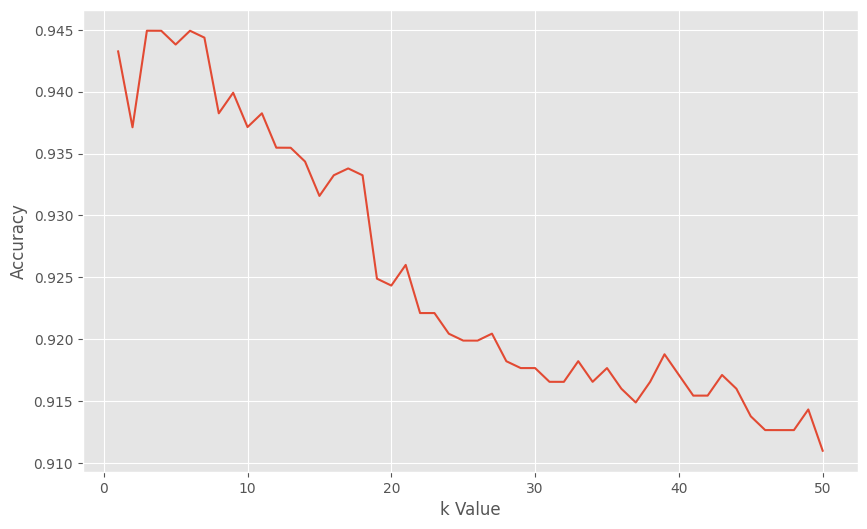

In [181]:
kValues = np.arange(1, 51)
accuracyValues = []
for k in kValues:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score( clf, X, y, cv=5 )
    accuracyValues.append(np.mean(scores))
    print("K Value: ", k, "accuracy: ", np.mean(scores))

print("Best value of k:", kValues[np.argmax(accuracyValues)])
plt.plot(kValues, accuracyValues)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.show()

In [182]:
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=1, test_size=0.8 )
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9554937413073713


# Part 2: Popularity of online news

## Task 2.1: Import the Data

In [183]:
#Use the pandas.read_csv() function to import the dataset
df = pd.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv", skipinitialspace = True)
# df.columns
# we don't need the url and timedelta, so drop these columns.
df = df.drop(["url", "timedelta"], axis=1) # axis =1 indicates columns

# Use the dataframe.values method to export the predictor variables as a numpy array called X
#this array should not include our target variable (the number of shares).

shares = df["shares"].values
print(shares)
X = df.drop(["shares"], axis=1).values

# We'll define an article to be popular if it received more shares than the median number of shares
shareMedian = np.median(shares)
print(shareMedian)

# Create a binary numpy array, y, which indicates whether or not each article is popular.
y = np.where(shares > shareMedian, 1, 0) # if true, put 1 into array, otherwise put 0


[ 593  711 1500 ... 1900 1100 1300]
1400.0


## Task 2.2: Exploratory Data Analysis

In [184]:
# First check to see if the values are reasonable. What are the min, median, and maximum number of shares?

print("Min: ", np.min(shares))
print("Max: ", np.max(shares))
print("Median: ", np.median(shares), "\n")
print(df["shares"].describe())

Min:  1
Max:  843300
Median:  1400.0 

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


## Task 2.3: Classification Using k-NN

Best value of k: 37
highest obtained accuracy:  0.5537289763502752


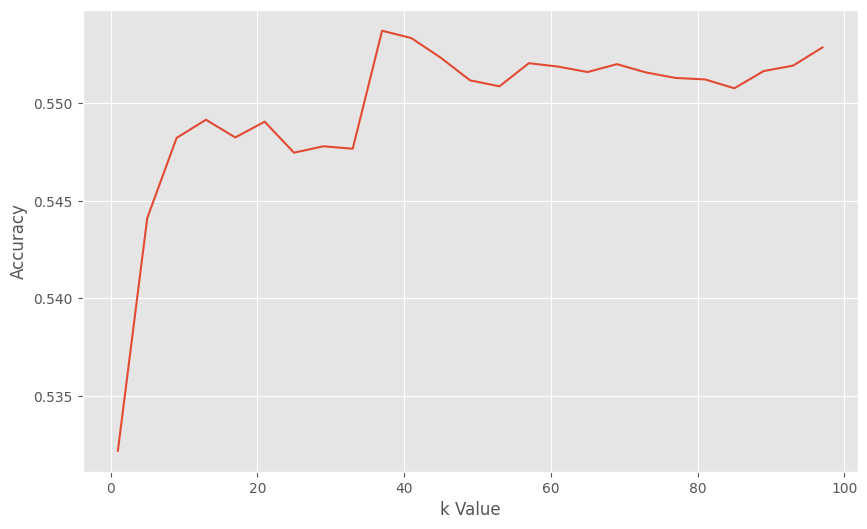

In [185]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=1, test_size=0.2 )
scaler = StandardScaler()
scaler.fit(X_train) # Fit only to the training data

# Apply scaling to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

kValues = np.arange(1, 100, 4)
accuracyValues = []
for k in kValues:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score( clf, X, y, cv=5 )
    accuracyValues.append(np.mean(scores))
#     print("K Value: ", k, "accuracy: ", np.mean(scores))

print("Best value of k:", kValues[np.argmax(accuracyValues)])
print("highest obtained accuracy: ", np.max(accuracyValues))
plt.plot(kValues, accuracyValues)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.show()

In [186]:
# use best k to get test accuracy 
clf = KNeighborsClassifier(n_neighbors=37)
clf.fit(X_train, y_train)

# Evaluate the model on the test data
testAccuracy = clf.score(X_test, y_test)
print("Test accuracy: ", testAccuracy)

Test accuracy:  0.6347584815235212


## Task 2.4 Classification using SVM

C Value:  1 accuracy:  0.5518000000000001
C Value:  3 accuracy:  0.558
C Value:  5 accuracy:  0.5360000000000001
C Value:  7 accuracy:  0.5276
C Value:  9 accuracy:  0.5276
C Value:  11 accuracy:  0.5272
C Value:  13 accuracy:  0.5268
C Value:  15 accuracy:  0.5268
C Value:  17 accuracy:  0.5268
C Value:  19 accuracy:  0.5268
C Value:  21 accuracy:  0.5266
C Value:  23 accuracy:  0.5266
C Value:  25 accuracy:  0.5264000000000001
C Value:  27 accuracy:  0.5258
C Value:  29 accuracy:  0.5276
C Value:  31 accuracy:  0.531
C Value:  33 accuracy:  0.532
C Value:  35 accuracy:  0.5308
C Value:  37 accuracy:  0.5312
C Value:  39 accuracy:  0.5316
C Value:  41 accuracy:  0.5298
C Value:  43 accuracy:  0.5282
C Value:  45 accuracy:  0.5258
C Value:  47 accuracy:  0.5252000000000001
C Value:  49 accuracy:  0.524
C Value:  51 accuracy:  0.5236000000000001
C Value:  53 accuracy:  0.5224
C Value:  55 accuracy:  0.5214000000000001
C Value:  57 accuracy:  0.5206
C Value:  59 accuracy:  0.5198
C Value

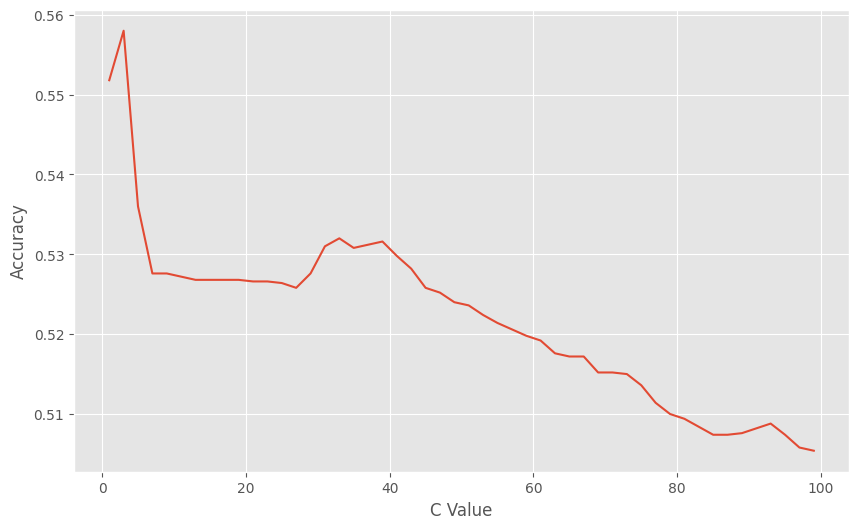

In [197]:
# SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles.
X_train, X_test, y_train, y_test = train_test_split( X[:5000], y[:5000], random_state=1, test_size=0.2 )
scaler = StandardScaler()
scaler.fit(X_train) # Fit only to the training data

# Apply scaling to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
cValues = np.arange(1, 101, 2)
accuracyValues = []
for c in cValues:
    clf = svm.SVC(kernel='rbf', C = c)
    scores = cross_val_score( clf, X[:5000], y[:5000], cv=5 )
    accuracyValues.append(np.mean(scores))
    print("C Value: ", c, "accuracy: ", np.mean(scores))

print("Best value of c:", cValues[np.argmax(accuracyValues)])
print("highest obtained accuracy: ", np.max(accuracyValues))
plt.plot(cValues, accuracyValues)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.show()

In [221]:
clf = svm.SVC(kernel='rbf', C=3)
clf.fit(X_train, y_train)
testAccuracy = clf.score(X_test, y_test)
print("Best accuracy:", testAccuracy)

Best accuracy: 0.585


## Task 2.5 Classification using decision trees

In [211]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.2)
maxDepthValues = np.arange(1, 16)
minSampleValues = np.arange(2, 20)
accuracyValues = []
for maxV in maxDepthValues:
    accuracyMaxValues = []
    for minV in minSampleValues:
        clf = tree.DecisionTreeClassifier(max_depth=maxV, min_samples_split=minV)
        scores = cross_val_score( clf, X, y, cv=5 )
        accuracyMaxValues.append(np.mean(scores))
    accuracyValues.append(accuracyMaxValues)
print(accuracyValues)

[[0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685, 0.5937350042423685], [0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707, 0.6079866929493707], [0.6170677286141549, 0.6170677286141549, 0.6170677286141549, 0.6170677286141549, 0.6170677286141549, 0.6170677286141549, 0.6170677286141549, 0.6170677286141549, 0.6170677286141549, 0.6170677286141549, 0.6170677286141549, 0.6170677286141549, 0.6170677286141549, 0.617067728614

In [212]:
accScores = np.array(accuracyValues)
accIndices = np.unravel_index(np.argmax(accScores), accScores.shape)

print("best max depth: ", maxDepthValues[accIndices[0]])
print("best min split: ", minSampleValues[accIndices[1]])
print("best accuracy: ", accScores[accIndices])

best max depth:  6
best min split:  18
best accuracy:  0.6175976651510714


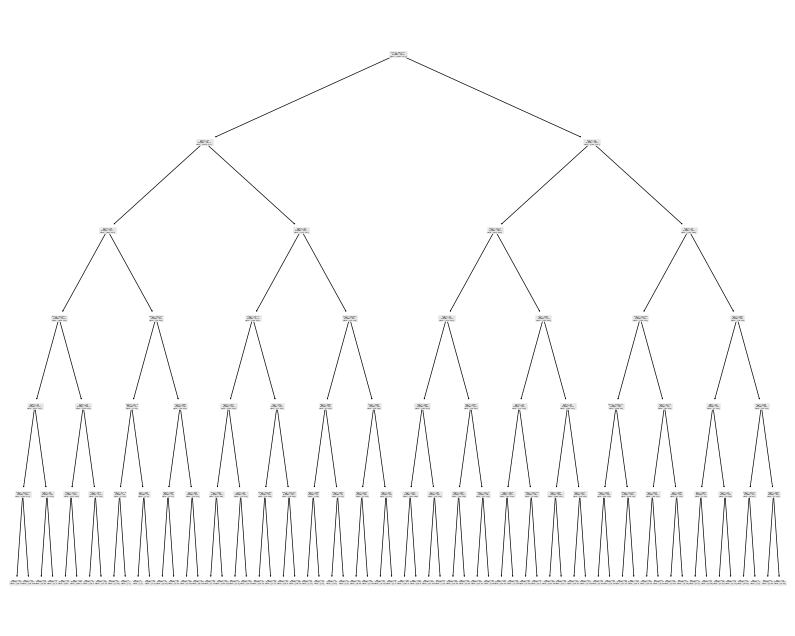

In [223]:
# plotting the tree
dTree = tree.DecisionTreeClassifier(max_depth=maxDepthValues[accIndices[0]], min_samples_split=minSampleValues[accIndices[1]])
dTree.fit(X, y)
plt.figure(figsize=(10, 8))
tree.plot_tree(dTree)
plt.show()

## Task 2.6 Describe your findings

Which method (k-NN, SVM, Decision Tree) worked best?

    Of the three different methods used, it appears that KNN worked the best due to it having the highest accuracy of 0.6347584815235212 for testing when using 37 for k. Decision tree was the second most accurate with and accuracy of 0.6175976651510714 when using max depth value of 6 and min split value of 18. SVM was the least accurate at 0.585 using a C value of 3.
    
How did different parameters influence the accuracy?

    For KNN, we were testing how changes in k, the number of neighbors to look for, had an effect on accuracy. It seems like accuracy quickly increased until around where I got the highest accuracy at k=37, after which the accuracy seems to taper off. I would imagine that at some point, as we continue to increase k, the accuracy may start to go down.
    For SVM, we were testing how changes in C, the Regularization parameter, had an effect on accuracy. A normal value for C is said to be between 1 and 10, so it makes sense that accuracy generally decreased as C got much higher. Too high of a C value can lead to overfitting, giving us less accurate testing data.
    For the decsion tree, we were testing how changes in the max depth value (essentially how tall the tree is) and min split value (essentially how wide the tree is) have an an effect on accuracy. I found max accuracy at a max depth value of 6. As it got higher than 6, accuracy descreased. Min split value wasn't as cut and dry/linear. I found the most accuracy at 18, but due to so much variation I think maybe this value could be less to avoid overfitting.
    
Which model is easiest to interpret?

        The decsion tree is the easiest to interpret because visually it is the easiest to understand. At each node you only have two choices, making it easy to follow a clear path to an answer. It has a clear hierarchical structure. The SVM was hardest for me because it requires making a 3D graph...adding dimensions can make things trickier to interpret.
        
How would you interpret your results?
    
    For KNN, I'd say that it is good until it isn't! Increasing k gives us greater accuracy only to a certain point. After that, we need to recognize accuracy doesn't improve and we need to be careful of creating too much noise for our model
    For SVM, we know that a larger value of C gives us a smaller margin, while a smaller value of C gives us a larger margin. If there is a larger margin, it is more likely for a data point to be misclassified and vice versa. So my seen results that accuracy of the SVM gets less as C gets very large makes sense because this can lead to overfitting. I'd be interested to do some more testing with SVM because they are very flexible and can be very accurate if done correctly.
    For the decsion tree, what my results tell me is that max depth may have a bigger impact on accuracy than min split value, but both are very important. I would be interested to test the effects of min split value more by testing using a constant max depth value. To me min split of 18 seems high.